Average Best Solution: [ 50.00111272  21.40289735  41.99041626 125.87469953]
Average Best Optimal: 0.2170938672212702
Average Best Optimal History: [-0.06075278 -0.00061153  0.03188081  0.05524132  0.07261045  0.07701839
  0.08772796  0.0907732   0.09904425  0.10112878  0.11384843  0.11707814
  0.11809831  0.11969751  0.12393051  0.12737404  0.12933858  0.13654522
  0.14179411  0.14225882  0.14292411  0.14703009  0.1478549   0.1498836
  0.15352646  0.15786914  0.15976766  0.15976766  0.15976766  0.16163556
  0.16163556  0.16585217  0.16691792  0.16707585  0.16707585  0.16707585
  0.16707585  0.16707585  0.16707585  0.16707585  0.16707585  0.17116502
  0.17116502  0.17116502  0.17116502  0.17116502  0.17133577  0.17133577
  0.17154967  0.17372373  0.17484053  0.17484053  0.17484053  0.17484053
  0.17484053  0.17484053  0.18048242  0.18081047  0.18219553  0.18385114
  0.18385114  0.18581137  0.18581137  0.18930086  0.18930086  0.18930086
  0.18930086  0.19141779  0.19141779  0.19141779  

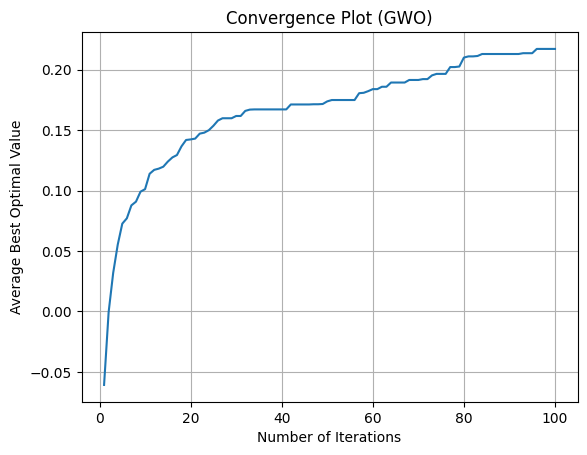

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Constants and objective functions
vishnu = 0  # Example value

c1 = 336.5140  # Example constant values
c2 = 0.8789
c3 = 21.6165
c4 = 37.7269
c5 = 513.2847
c6 = 1197.9836

def switch_vishnu(vishnu):
    switch_dict = {
        0: (1/6, 1/6, 1/6, 1/6, 1/6, 1/6),
        1: (1, 0, 0, 0, 0, 0),
        2: (0, 1, 0, 0, 0, 0),
        3: (0, 0, 1, 0, 0, 0),
        4: (0, 0, 0, 1, 0, 0),
        5: (0, 0, 0, 0, 1, 0),
        6: (0, 0, 0, 0, 0, 1)
    }

    return switch_dict.get(vishnu, (0, 0, 0, 0, 0, 0))

w1, w2, w3, w4, w5, w6 = switch_vishnu(vishnu)

def objective_function(x):
    Toff, Ton, Sv, Ip = x
    KW = 81 + 6.66*Toff + 0.19*Ton + 0.665*Sv + 0.311*Ip - 0.0522*Toff*Toff + 0.0002*Ton*Ton - 0.00044*Sv*Sv - 0.000293*Ip*Ip - 0.0060*Toff*Ton - 0.00346*Toff*Sv - 0.00413*Toff*Ip- 0.00025*Ton*Sv + 0.00727*Ton*Ip - 0.00132*Sv*Ip
    PCV = 29.8 - 0.942*Toff + 0.327*Ton - 0.1848*Sv + 0.0769*Ip + 0.00733*Toff*Toff + 0.00018*Ton*Ton + 0.000505*Sv*Sv + 0.000006*Ip*Ip - 0.00321*Toff*Ton + 0.002936*Toff*Sv - 0.001016*Toff*Ip - 0.002419*Ton*Sv + 0.000788*Ton*Ip - 0.000348*Sv*Ip
    SR = -55.7 + 1.97*Toff + 1.011*Ton + 0.223*Sv + 0.123*Ip - 0.0195*Toff*Toff - 0.00414*Ton*Ton - 0.00223*Sv*Sv - 0.000372*Ip*Ip - 0.00998*Toff*Ton + 0.00155*Toff*Sv - 0.00050*Toff*Ip - 0.00574*Ton*Sv + 0.003548*Ton*Ip - 0.000498*Sv*Ip
    ED = 56.3 - 1.93*Toff + 0.908*Ton + 0.575*Sv + 0.230*Ip + 0.0161*Toff*Toff + 0.00243*Ton*Ton - 0.00221*Sv*Sv - 0.000953*Ip*Ip - 0.00252*Toff*Ton - 0.00391*Toff*Sv + 0.00025*Toff*Ip - 0.00929*Ton*Sv + 0.001208*Ton*Ip - 0.000628*Sv*Ip
    LE= 213 + 2.5*Toff + 1.17*Ton + 0.35*Sv + 1.882*Ip + 0.018*Toff*Toff + 0.1621*Ton*Ton - 0.0034*Sv*Sv + 0.00035*Ip*Ip - 0.0413*Toff*Ton + 0.0088*Toff*Sv - 0.0246*Toff*Ip - 0.0017*Ton*Sv - 0.02156*Ton*Ip - 0.00285*Sv*Ip
    CE = 17673 - 578*Toff + 37.1*Ton - 20.4*Sv + 3.9*Ip + 4.83*Toff*Toff - 0.282*Ton*Ton - 0.032*Sv*Sv - 0.0235*Ip*Ip - 0.837*Toff*Ton + 0.476*Toff*Sv - 0.019*Toff*Ip - 0.194*Ton*Sv + 0.342*Ton*Ip - 0.0439*Sv*Ip

    if vishnu == 0:
        optimal = - w1 * KW / c1 + w2 * PCV / c2 - w3 * SR / c3 - w4 * ED / c4 - w5 * LE / c5 - w6 * CE / c6
    else:
        optimal = - w1 * KW + w2 * PCV - w3 * SR - w4 * ED - w5 * LE - w6 * CE
    return  optimal

# Define bounds for variables
lower_bound = np.array([51, 5, 40, 70])
upper_bound = np.array([63, 25, 80, 150])

# Grey Wolf Optimization Algorithm
def GWO(num_iterations):
    num_agents = 5
    num_variables = len(lower_bound)
    best_solution = None
    best_optimal = float('-inf')
    best_optimal_history = []

    for _ in range(num_iterations):
        positions = np.random.uniform(lower_bound, upper_bound, size=(num_agents, num_variables))
        objectives = np.array([objective_function(pos) for pos in positions])
        local_best_index = np.argmax(objectives)

        if objectives[local_best_index] > best_optimal:
            best_solution = positions[local_best_index]
            best_optimal = objectives[local_best_index]

        for i in range(num_agents):
            a = 2 - 2 * _ / num_iterations
            r1, r2 = np.random.rand(2)
            A1 = 2 * a * r1 - a
            C1 = 2 * r2
            D_alpha = abs(C1 * best_solution - positions[i])
            X1 = best_solution - A1 * D_alpha

            r1, r2 = np.random.rand(2)
            A2 = 2 * a * r1 - a
            C2 = 2 * r2
            D_beta = abs(C2 * positions[np.argsort(objectives)[-2]] - positions[i])
            X2 = positions[np.argsort(objectives)[-2]] - A2 * D_beta

            r1, r2 = np.random.rand(2)
            A3 = 2 * a * r1 - a
            C3 = 2 * r2
            D_delta = abs(C3 * positions[np.argsort(objectives)[-1]] - positions[i])
            X3 = positions[np.argsort(objectives)[-1]] - A3 * D_delta

            positions[i] = (X1 + X2 + X3) / 3

        best_optimal_history.append(best_optimal)

    return best_solution, best_optimal, best_optimal_history

# Run GWO 30 times and collect results
num_runs = 30
num_iterations = 100
best_solution_sum = np.zeros(len(lower_bound))
best_optimal_sum = 0.0
best_optimal_history_sum = np.zeros(num_iterations)

for _ in range(num_runs):
    best_solution, best_optimal, best_optimal_history = GWO(num_iterations)
    best_solution_sum += best_solution
    best_optimal_sum += best_optimal
    best_optimal_history_sum += np.array(best_optimal_history)

# Calculate averages
average_best_solution = best_solution_sum / num_runs
average_best_optimal = best_optimal_sum / num_runs
average_best_optimal_history = best_optimal_history_sum / num_runs

# Print or use the averages as needed
print("Average Best Solution:", average_best_solution)
print("Average Best Optimal:", average_best_optimal)
print("Average Best Optimal History:", average_best_optimal_history)

# Plot the average best optimal value over iterations
plt.plot(range(1, num_iterations + 1), average_best_optimal_history)
plt.xlabel('Number of Iterations')
plt.ylabel('Average Best Optimal Value')
plt.title('Convergence Plot (GWO)')
plt.grid(True)
plt.show()
